### General stuff

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import os

from scipy.optimize import curve_fit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## Adjust ligand concentration with the Koff and Kon values in order to shift the DR-curves along the x-axis, 
# because of the change in the Kd values of the ligand caused by the changed Koff.Kon value from the default values (koff=0.0003,kon=0.3)

def adjust_ligand_ccs(ligand_ccs, koff, kon):
    Kd_ratio = (koff/ kon) / (0.0003 / 0.3)
    ligands = ligand_ccs * Kd_ratio
    return (ligands)

## Get filename of .csv 
def load_dataframe(dirname,process_name,ligand,kon,koff,molecules_dict,molecule,factor=None):
    
    if factor!=None:
        fname=dirname+ '_'.join([process_name,str(factor),'koff',str(koff),'kon',str(kon),'ligand_cc',str(round(ligand,3))]) + '.csv'
    if factor==None:
        fname=dirname+ '_'.join([process_name,'koff',str(koff),'kon',str(kon),'ligand_cc',str(round(ligand,3))]) + '.csv'

    col_nums=[int(x+1) for x in molecules_dict[molecule]]
    col_nums.append(0)
    mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
    return mol_ccs_df

In [8]:
molecules_dict={'$\mathbf{G_{GTP}}$':[23,33],
                '$\mathbf{IP_{3}}$':[40],
                'Total Arrestin-Receptor':[10,11,12,13,14,15],
                'PM Arrestin-Receptor':[10,11,12],
                'IC Arrestin-Receptor':[13,14,15]}


## High Koff: create figure with both high Koff==0.03 and Koff==0.3
k_on = 0.3
high_koff=0.03
low_koff=0.0003

In [9]:
def DR_curve(ligands, Emax, logEC50):
  return Emax / (1+10**(logEC50-ligands))

In [5]:
font = {'fontname':'Arial'}
out_dir = '/content/drive/MyDrive/gpcr-ode-figures/'


### Fig6 A-C

#### With internalisation

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.03_kon_0.3_ligand_cc_-5.0.csv',
                    sep=',', header=0, index_col=0)
data2 = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.0003_kon_0.3_ligand_cc_-5.0.csv',
                    sep=',', header=0, index_col=0)
data1.columns = data1.columns.astype(int)
data2.columns = data2.columns.astype(int)

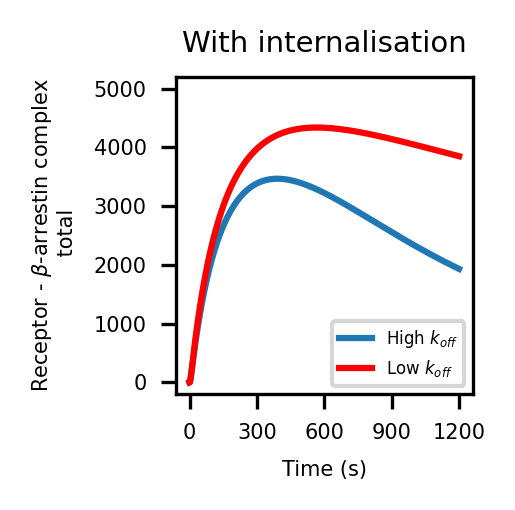

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(data1[molecules_dict['Total Arrestin-Receptor']].sum(1))
plt.plot(data2[molecules_dict['Total Arrestin-Receptor']].sum(1), color='r')
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.title('With internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n total', fontsize=5, fontname='Arial')
plt.legend([r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6a-top.pdf')

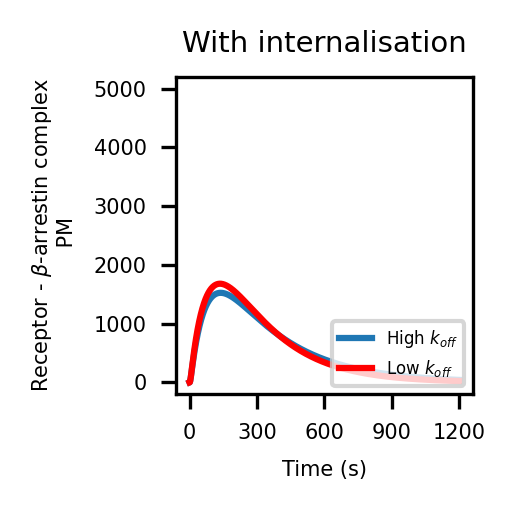

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(data1[molecules_dict['PM Arrestin-Receptor']].sum(1))
plt.plot(data2[molecules_dict['PM Arrestin-Receptor']].sum(1), color='r')
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.title('With internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n PM', fontsize=5, fontname='Arial')
plt.legend([r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6b-top.pdf')

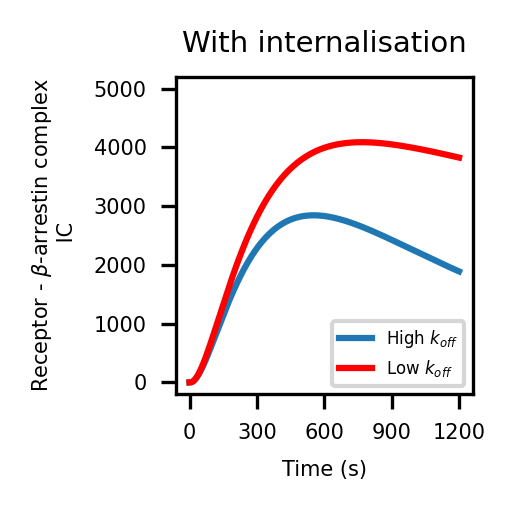

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(data1[molecules_dict['IC Arrestin-Receptor']].sum(1))
plt.plot(data2[molecules_dict['IC Arrestin-Receptor']].sum(1), color='r')
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.title('With internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n IC', fontsize=5, fontname='Arial')
plt.legend([r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6c-top.pdf')

#### No internalisation

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.03_kon_0.3_ligand_cc_-5.0.csv',
                    sep=',', header=0, index_col=0)
data2 = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.0003_kon_0.3_ligand_cc_-5.0.csv',
                    sep=',', header=0, index_col=0)
data1.columns = data1.columns.astype(int)
data2.columns = data2.columns.astype(int)

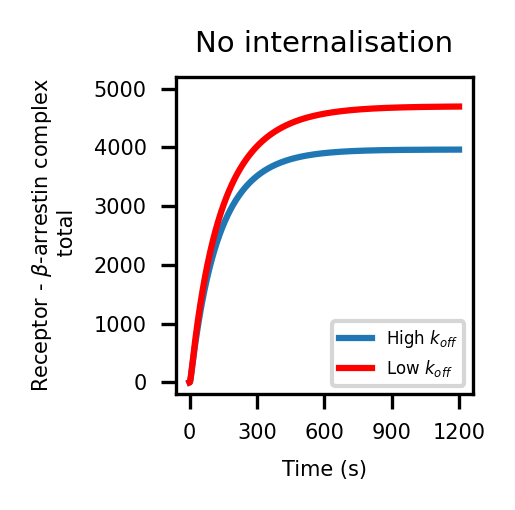

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(data1[molecules_dict['Total Arrestin-Receptor']].sum(1))
plt.plot(data2[molecules_dict['Total Arrestin-Receptor']].sum(1), color='r')
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.title('No internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n total', fontsize=5, fontname='Arial')
plt.legend([r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6a-bottom.pdf')

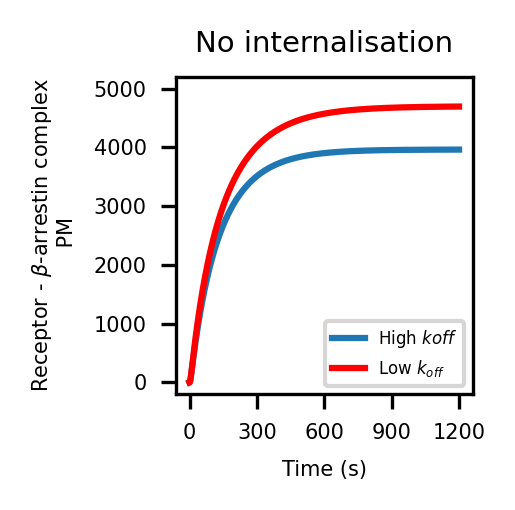

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(data1[molecules_dict['PM Arrestin-Receptor']].sum(1))
plt.plot(data2[molecules_dict['PM Arrestin-Receptor']].sum(1), color='r')
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.title('No internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n PM', fontsize=5, fontname='Arial')
plt.legend([r'High $k{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6b-bottom.pdf')

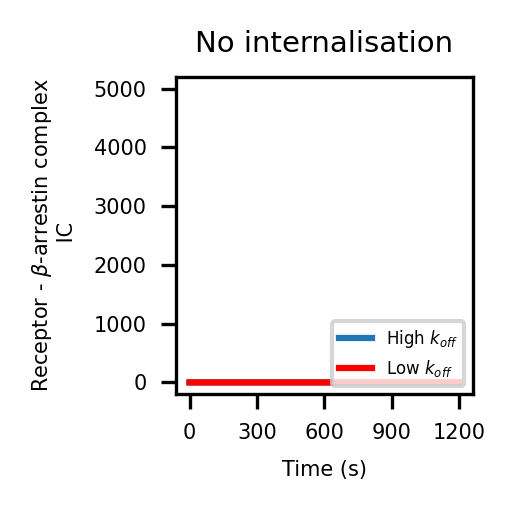

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(data1[molecules_dict['IC Arrestin-Receptor']].sum(1))
plt.plot(data2[molecules_dict['IC Arrestin-Receptor']].sum(1), color='r')
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.title('No internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n IC', fontsize=5, fontname='Arial')
plt.legend([r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6c-botoom.pdf')

### Fig6 D

In [13]:
def DR_curve(ligands, Emax, logEC50):
  return Emax / (1+10**(logEC50-ligands))
t = 1200.0

#### With internalisation

In [ ]:
low_koff_ccs = [-12, -11, -10, -9, -8, -7, -6, -5]
high_koff_ccs = [-10, -9, -8, -7, -6, -5, -4, -3]
low_koff_arr = []
high_koff_arr = []
t = 1200.0

for cc in low_koff_ccs:
  data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.0003_kon_0.3_ligand_cc_%i.0.csv' % cc,
                    sep=',', header=0, index_col=0)
  data.columns = data.columns.astype(int)
  low_koff_arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])

for cc in high_koff_ccs:
  data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.03_kon_0.3_ligand_cc_%i.0.csv' % cc,
                    sep=',', header=0, index_col=0)
  data.columns = data.columns.astype(int)
  high_koff_arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])

In [ ]:
temp = curve_fit(DR_curve, 
                 np.array(low_koff_ccs).astype(float), 
                 np.array(low_koff_arr).astype(float),
                 p0=(np.array(low_koff_arr).astype(float).max(), np.median(np.array(low_koff_ccs).astype(float))),
                 )
Emax, EC50 = temp[0]
sim_low_koff_ccs = np.arange(low_koff_ccs[0], low_koff_ccs[-1], 0.1)
sim_low_koff_arr = DR_curve(sim_low_koff_ccs, Emax, EC50)

temp = curve_fit(DR_curve, 
                 np.array(high_koff_ccs).astype(float), 
                 np.array(high_koff_arr).astype(float),
                 p0=(np.array(high_koff_arr).astype(float).max(), np.median(np.array(high_koff_ccs).astype(float))),
                 )
Emax, EC50 = temp[0]
sim_high_koff_ccs = np.arange(high_koff_ccs[0], high_koff_ccs[-1], 0.1)
sim_high_koff_arr = DR_curve(sim_high_koff_ccs, Emax, EC50) 

(-12.45, -2.55)

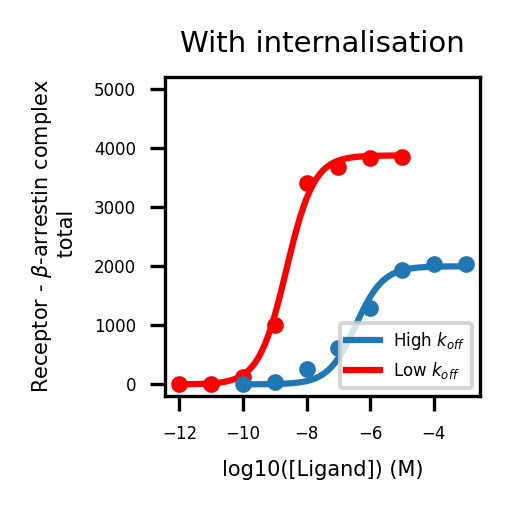

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(low_koff_ccs, low_koff_arr, '.', color='r')
line1, = plt.plot(sim_low_koff_ccs, sim_low_koff_arr, color='r')
plt.plot(high_koff_ccs, high_koff_arr, '.', color=sns.color_palette()[0])
line2, = plt.plot(sim_high_koff_ccs, sim_high_koff_arr, color=sns.color_palette()[0])
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=4, fontname='Arial')
plt.xticks([-12, -10, -8, -6, -4], fontsize=4, fontname='Arial')
plt.title('With internalisation', fontsize=7, fontname='Arial')
plt.xlabel('log10([Ligand]) (M)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n total', fontsize=5, fontname='Arial')
plt.legend([line2, line1], [r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6d-top.pdf')
plt.xlim()

#### No internalisation

In [ ]:
low_koff_ccs = [-12, -11, -10, -9, -8, -7, -6, -5]
high_koff_ccs = [-10, -9, -8, -7, -6, -5, -4, -3]
low_koff_arr = []
high_koff_arr = []
t = 1200.0

for cc in low_koff_ccs:
  data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.0003_kon_0.3_ligand_cc_%i.0.csv' % cc,
                    sep=',', header=0, index_col=0)
  data.columns = data.columns.astype(int)
  low_koff_arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])

for cc in high_koff_ccs:
  data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/Koff_Kon_all_koff_0.03_kon_0.3_ligand_cc_%i.0.csv' % cc,
                    sep=',', header=0, index_col=0)
  data.columns = data.columns.astype(int)
  high_koff_arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])

In [ ]:
temp = curve_fit(DR_curve, 
                 np.array(low_koff_ccs).astype(float), 
                 np.array(low_koff_arr).astype(float),
                 p0=(np.array(low_koff_arr).astype(float).max(), np.median(np.array(low_koff_ccs).astype(float))),
                 )
Emax, EC50 = temp[0]
sim_low_koff_ccs = np.arange(low_koff_ccs[0], low_koff_ccs[-1], 0.1)
sim_low_koff_arr = DR_curve(sim_low_koff_ccs, Emax, EC50)

temp = curve_fit(DR_curve, 
                 np.array(high_koff_ccs).astype(float), 
                 np.array(high_koff_arr).astype(float),
                 p0=(np.array(high_koff_arr).astype(float).max(), np.median(np.array(high_koff_ccs).astype(float))),
                 )
Emax, EC50 = temp[0]
sim_high_koff_ccs = np.arange(high_koff_ccs[0], high_koff_ccs[-1], 0.1)
sim_high_koff_arr = DR_curve(sim_high_koff_ccs, Emax, EC50) 

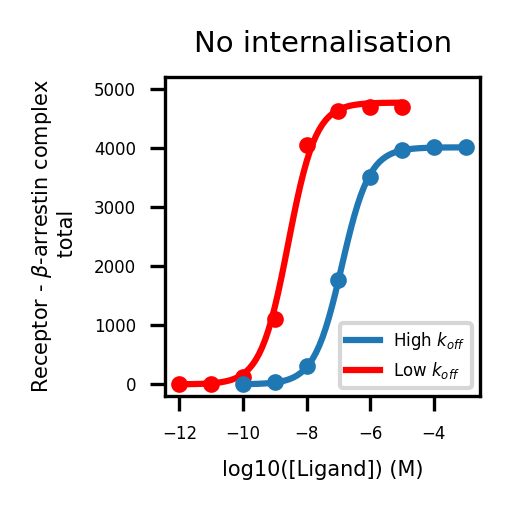

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
plt.plot(low_koff_ccs, low_koff_arr, '.', color='r')
line1, = plt.plot(sim_low_koff_ccs, sim_low_koff_arr, color='r')
plt.plot(high_koff_ccs, high_koff_arr, '.', color=sns.color_palette()[0])
line2, = plt.plot(sim_high_koff_ccs, sim_high_koff_arr, color=sns.color_palette()[0])
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=4, fontname='Arial')
plt.xticks([-12, -10, -8, -6, -4], fontsize=4, fontname='Arial')
plt.title('No internalisation', fontsize=7, fontname='Arial')
plt.xlabel('log10([Ligand]) (M)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n total', fontsize=5, fontname='Arial')
plt.legend([line2, line1], [r'High $k_{off}$', r'Low $k_{off}$'], fontsize=4, loc=4)
plt.tight_layout()
plt.savefig(out_dir+'figure-6d-bottom.pdf')

### Fig6 e

#### Data summary

In [ ]:
pnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/')
pnames.remove('.DS_Store')
pnames.remove('Koff_Kon_all')
pnames.remove('Internalisation')
factors = ['0.01', '0.03', '0.1', '0.3', '1', '3', '10', '30', '100']
kon = '0.3'
koff_low = '0.0003'
koff_high = '0.03'

In [ ]:
results = pd.DataFrame(columns=['perturbation', 'factor', 
                             'low_total', 'low_pm', 'low_ic', 'low_fitted',
                             'high_total', 'high_pm', 'high_ic', 'high_fitted'])

In [ ]:
for pname_ in pnames:
  print(pname_)
  for factor_ in factors:
    ### low koff
    fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/'+pname_)
    try:
      fnames.remove('.DS_Store')
    except:
      pass
    fnames = [x.replace('IC_PM', 'IC-PM') for x in fnames]
    fnames = [x for x in fnames if x.split('_')[2] == factor_]
    fnames = [x for x in fnames if x.split('_')[4] == koff_low]
    fnames = [x for x in fnames if x.split('_')[6] == kon]
    fnames = [x.replace('IC-PM', 'IC_PM') for x in fnames]
    arr = []
    cc = []
    for fname_ in fnames:
      data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
      data.columns = data.columns.astype(int)
      cc.append(float(fname_.split('_')[-1][:-4]))
      arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
    i = np.where(cc==np.max(cc))[0][0]
    fname_ = fnames[i]
    temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr).astype(float),
                    p0=(np.array(arr).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
    Emax, EC50 = temp[0]
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    result_ = [pname_, 
              factor_, 
              data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t],
              data[molecules_dict['PM Arrestin-Receptor']].sum(1)[t],
              data[molecules_dict['IC Arrestin-Receptor']].sum(1)[t],
              Emax
              ]
    ### high koff
    fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/'+pname_)
    try:
      fnames.remove('.DS_Store')
    except:
      pass
    fnames = [x.replace('IC_PM', 'IC-PM') for x in fnames]
    fnames = [x for x in fnames if x.split('_')[2] == factor_]
    fnames = [x for x in fnames if x.split('_')[4] == koff_high]
    fnames = [x for x in fnames if x.split('_')[6]== kon]
    fnames = [x.replace('IC-PM', 'IC_PM') for x in fnames]
    arr = []
    cc = []
    for fname_ in fnames:
      data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
      data.columns = data.columns.astype(int)
      cc.append(float(fname_.split('_')[-1][:-4]))
      arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
    i = np.where(cc==np.max(cc))[0][0]
    fname_ = fnames[i]
    temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr).astype(float),
                    p0=(np.array(arr).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
    Emax, EC50 = temp[0]
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    result_ = result_ + [data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t],
                        data[molecules_dict['PM Arrestin-Receptor']].sum(1)[t],
                        data[molecules_dict['IC Arrestin-Receptor']].sum(1)[t],
                        Emax]
    results.loc[len(results)] = result_

Phosphatase_PM
Phosphorylation_IC_PM
Arrestin_association
Phosphatase_IC
Phosphorylation_PM
Arrestin_dissociation
Phosphatase_IC_PM
Phosphorylation_IC


In [ ]:
results.to_csv(out_dir+'with-internalisation-perturb.csv')

In [ ]:
results = pd.DataFrame(columns=['perturbation', 'factor', 
                             'low_total', 'low_pm', 'low_ic', 'low_fitted',
                             'high_total', 'high_pm', 'high_ic', 'high_fitted'])

In [ ]:
for pname_ in pnames:
  print(pname_)
  for factor_ in factors:
    ### low koff
    fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/'+pname_)
    try:
      fnames.remove('.DS_Store')
    except:
      pass
    fnames = [x.replace('IC_PM', 'IC-PM') for x in fnames]
    fnames = [x for x in fnames if x.split('_')[2] == factor_]
    fnames = [x for x in fnames if x.split('_')[4] == koff_low]
    fnames = [x for x in fnames if x.split('_')[6] == kon]
    fnames = [x.replace('IC-PM', 'IC_PM') for x in fnames]
    arr = []
    cc = []
    for fname_ in fnames:
      data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
      data.columns = data.columns.astype(int)
      cc.append(float(fname_.split('_')[-1][:-4]))
      arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
    i = np.where(cc==np.max(cc))[0][0]
    fname_ = fnames[i]
    temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr).astype(float),
                    p0=(np.array(arr).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
    Emax, EC50 = temp[0]
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    result_ = [pname_, 
              factor_, 
              data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t],
              data[molecules_dict['PM Arrestin-Receptor']].sum(1)[t],
              data[molecules_dict['IC Arrestin-Receptor']].sum(1)[t],
              Emax
              ]
    ### high koff
    fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/'+pname_)
    try:
      fnames.remove('.DS_Store')
    except:
      pass
    fnames = [x.replace('IC_PM', 'IC-PM') for x in fnames]
    fnames = [x for x in fnames if x.split('_')[2] == factor_]
    fnames = [x for x in fnames if x.split('_')[4] == koff_high]
    fnames = [x for x in fnames if x.split('_')[6]== kon]
    fnames = [x.replace('IC-PM', 'IC_PM') for x in fnames]
    arr = []
    cc = []
    for fname_ in fnames:
      data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
      data.columns = data.columns.astype(int)
      cc.append(float(fname_.split('_')[-1][:-4]))
      arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
    i = np.where(cc==np.max(cc))[0][0]
    fname_ = fnames[i]
    temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr).astype(float),
                    p0=(np.array(arr).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
    Emax, EC50 = temp[0]
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/'+pname_+'/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    result_ = result_ + [data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t],
                        data[molecules_dict['PM Arrestin-Receptor']].sum(1)[t],
                        data[molecules_dict['IC Arrestin-Receptor']].sum(1)[t],
                        Emax]
    results.loc[len(results)] = result_

Phosphatase_PM
Phosphorylation_IC_PM
Arrestin_association
Phosphatase_IC
Phosphorylation_PM
Arrestin_dissociation
Phosphatase_IC_PM
Phosphorylation_IC


In [ ]:
results.to_csv(out_dir+'no-internalisation-perturb.csv')

#### Plots

In [ ]:
results_int = pd.read_csv(out_dir+'with-internalisation-perturb.csv',
                          sep=',', header=0, index_col=0)
results_noint = pd.read_csv(out_dir+'no-internalisation-perturb.csv',
                          sep=',', header=0, index_col=0)

In [ ]:
results_int['delta_total'] = results_int['low_total'] - results_int['high_total']
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='delta_total')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()

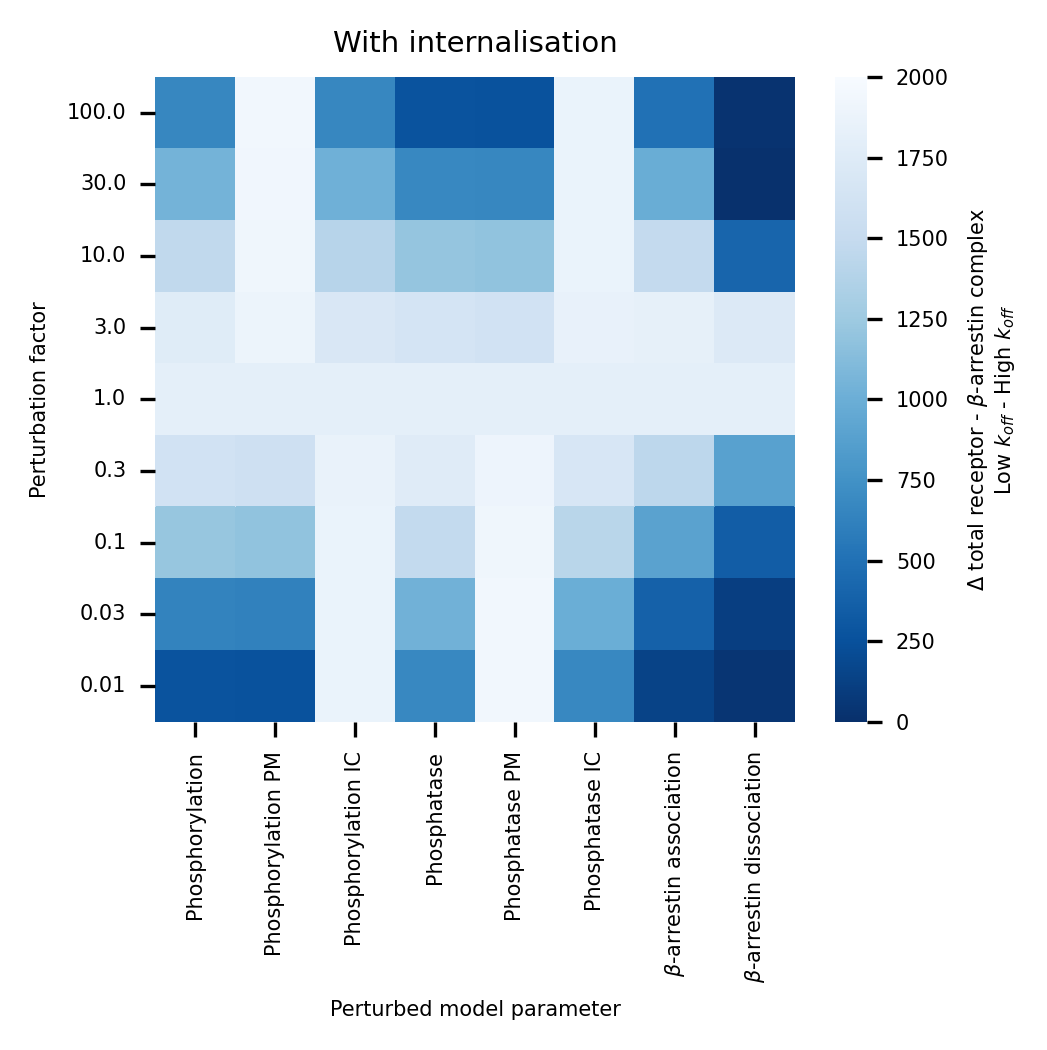

In [ ]:
f = plt.figure(figsize=(3.6, 3.6), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=2000)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5, fontname='Arial')
plt.title('With internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=5, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=5, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label(r"$\Delta$" " total receptor - " r"$\beta$-arrestin complex" "\n" r'Low $k_{off}$' " - " r'High $k_{off}$', 
               fontsize=5, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=5)
plt.tight_layout()
plt.savefig(out_dir+'figure6e-left.pdf')

In [ ]:
results_noint['delta_total'] = results_noint['low_total'] - results_noint['high_total']
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='delta_total')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']

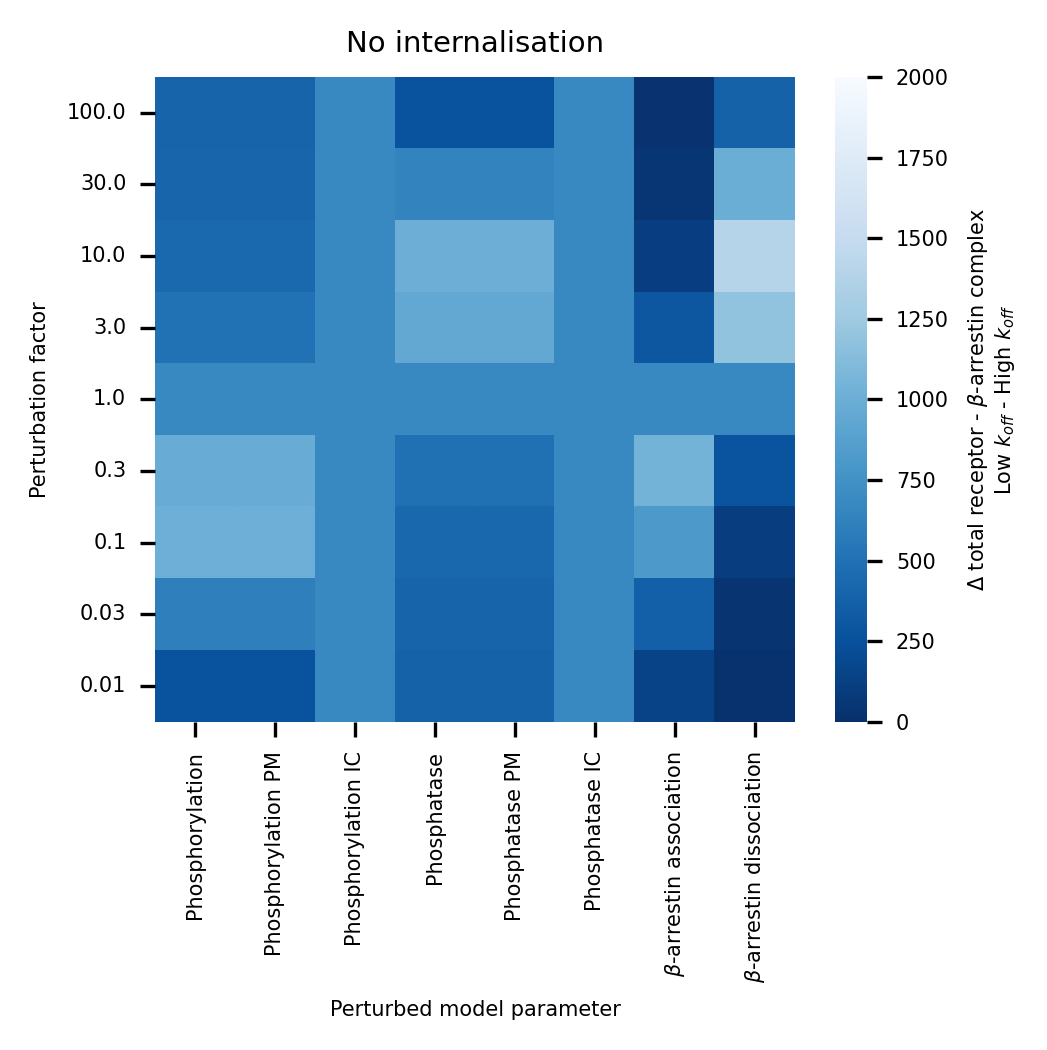

In [ ]:
f = plt.figure(figsize=(3.6, 3.6), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=2000)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=5, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=5, fontname='Arial')
plt.title('No internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=5, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=5, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label(r"$\Delta$" " total receptor - " r"$\beta$-arrestin complex" "\n" r'Low $k_{off}$' " - " r'High $k_{off}$', 
               fontsize=5, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=5)
plt.tight_layout()
plt.savefig(out_dir+'figure6e-right.pdf')

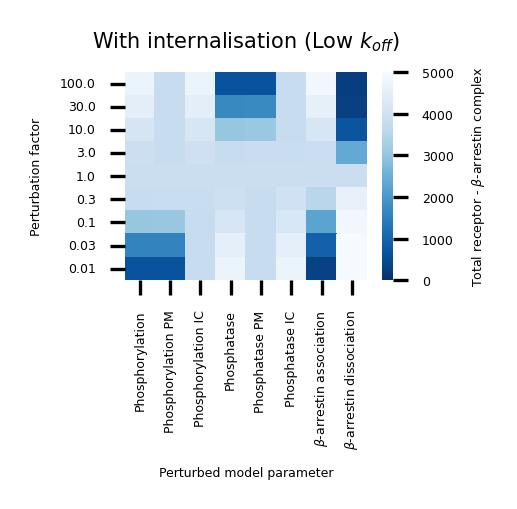

In [ ]:
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='low_total')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('With internalisation ('r'Low $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("Total receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18a-left.pdf')

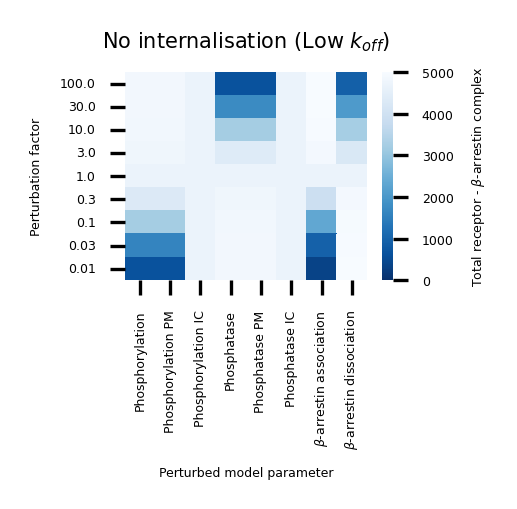

In [ ]:
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='low_total')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('No internalisation ('r'Low $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("Total receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18a-right.pdf')

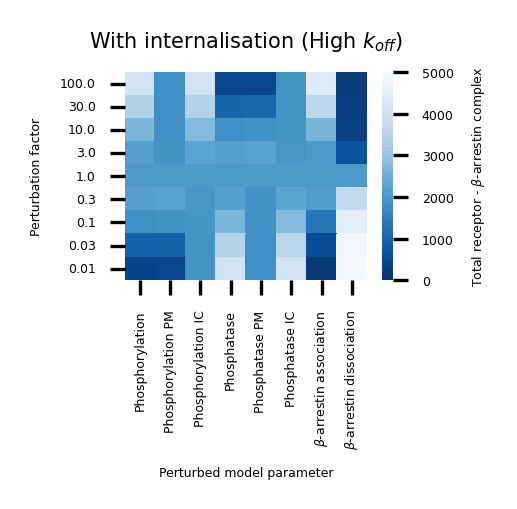

In [ ]:
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='high_total')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('With internalisation ('r'High $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("Total receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18b-left.pdf')

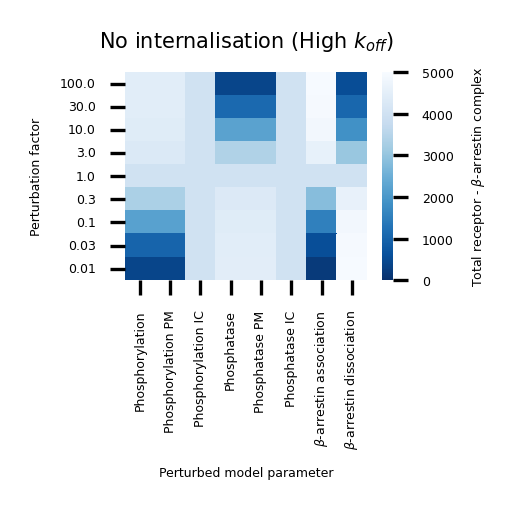

In [ ]:
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='high_total')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('No internalisation ('r'High $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("Total receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18b-right.pdf')

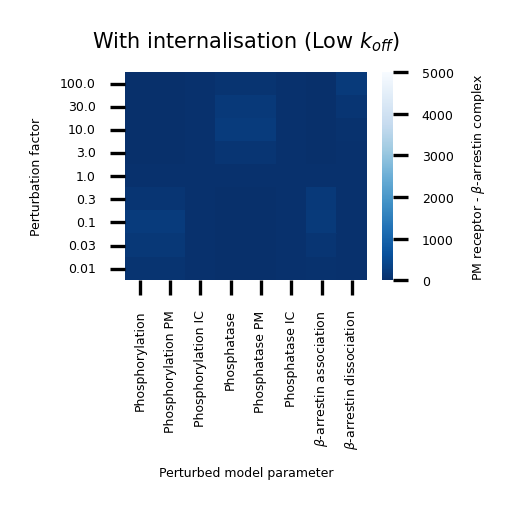

In [ ]:
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='low_pm')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('With internalisation ('r'Low $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("PM receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18c-left.pdf')

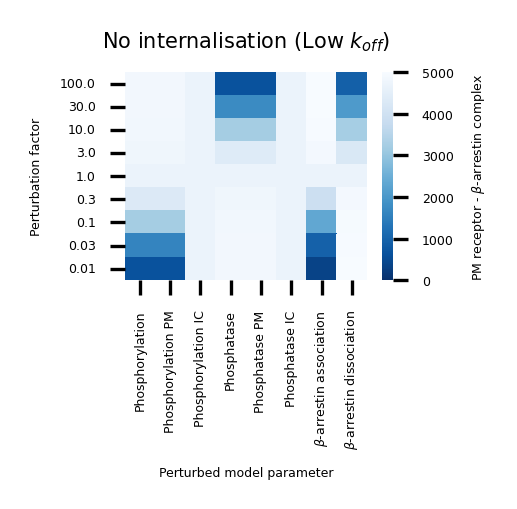

In [ ]:
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='low_pm')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('No internalisation ('r'Low $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("PM receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18c-right.pdf')

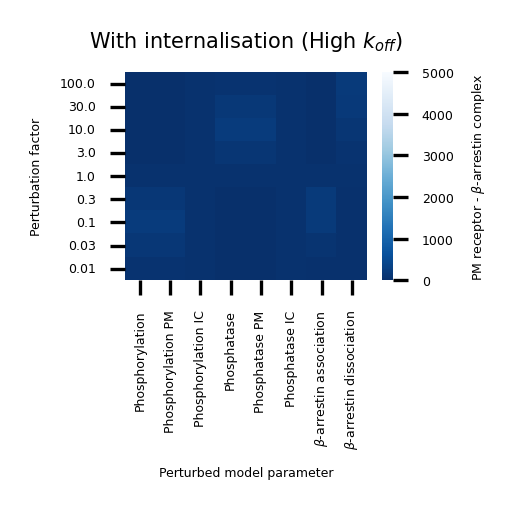

In [ ]:
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='high_pm')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('With internalisation ('r'High $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("PM receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18d-left.pdf')

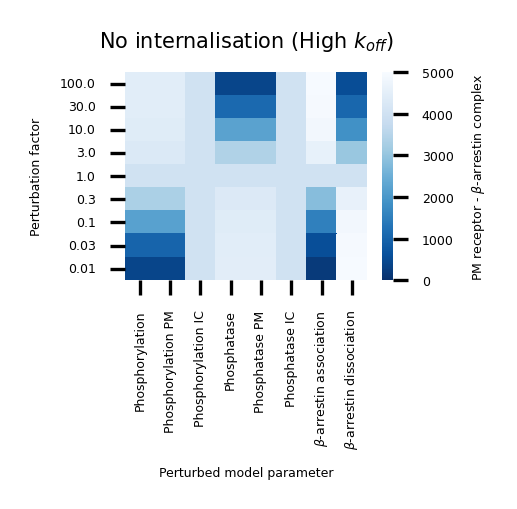

In [ ]:
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='high_pm')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('No internalisation ('r'High $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("PM receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18d-right.pdf')

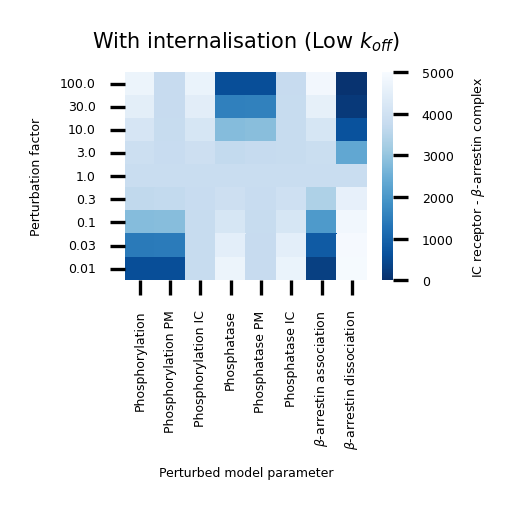

In [ ]:
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='low_ic')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('With internalisation ('r'Low $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("IC receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18e-left.pdf')

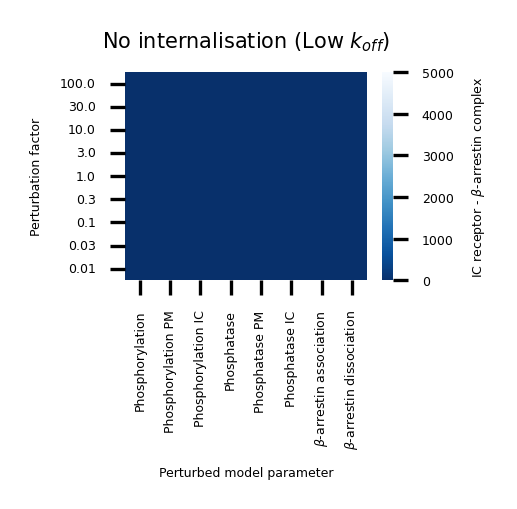

In [ ]:
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='low_ic')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('No internalisation ('r'Low $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("IC receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18e-right.pdf')

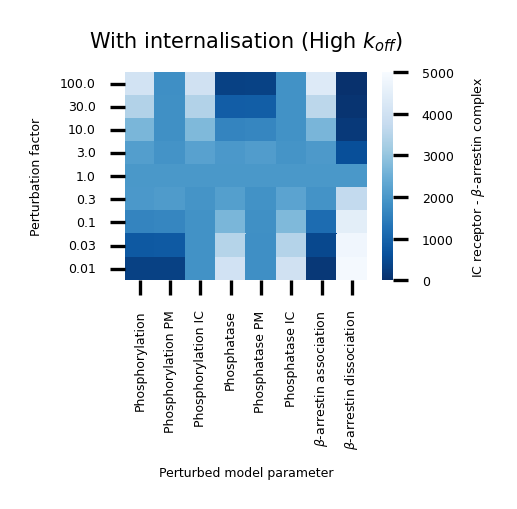

In [ ]:
data = pd.pivot_table(results_int, index='factor', columns='perturbation', values='high_ic')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('With internalisation ('r'High $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("IC receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18f-left.pdf')

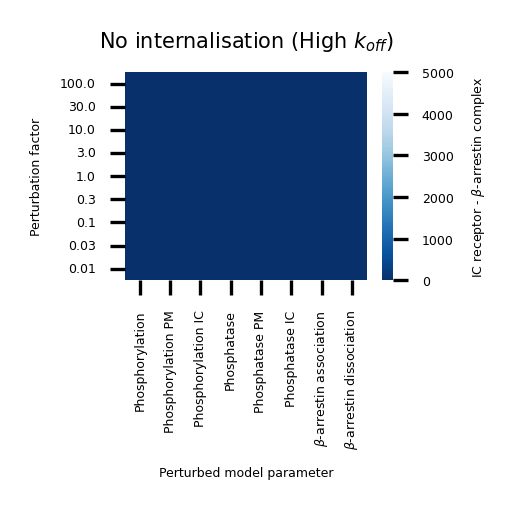

In [ ]:
data = pd.pivot_table(results_noint, index='factor', columns='perturbation', values='high_ic')
data = data.sort_index(ascending=False)
data = data[['Phosphorylation_IC_PM', 'Phosphorylation_PM', 'Phosphorylation_IC',
            'Phosphatase_IC_PM', 'Phosphatase_PM', 'Phosphatase_IC',
            'Arrestin_association', 'Arrestin_dissociation']]
data.columns = ['Phosphorylation', 'Phosphorylation PM', 'Phosphorylation IC',
                'Phosphatase', 'Phosphatase PM', 'Phosphatase IC',
                r'$\beta$-arrestin association', r'$\beta$-arrestin dissociation']
color_middle = data.loc[1].mean()
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = sns.heatmap(data, cmap='Blues_r', vmin=0, vmax=5000,
                 xticklabels=True, yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=3, fontname='Arial')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=3, fontname='Arial')
plt.title('No internalisation ('r'High $k_{off}$' ')' , fontsize=5, fontname='Arial')
plt.xlabel('Perturbed model parameter', fontsize=3, fontname='Arial')
plt.ylabel('Perturbation factor', fontsize=3, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label("IC receptor - " r"$\beta$-arrestin complex", 
               fontsize=3, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=3)
plt.tight_layout()
plt.savefig(out_dir+'figures18f-right.pdf')

### Figure 6 **fg**

#### arrestin

In [14]:
fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/')
try:
    fnames.remove('.DS_Store')
except:
    pass

In [15]:
kons = ['0.03', '0.3', '3']
koffs = ['0.0003', '0.001', '0.003', '0.01', '0.03']
results = pd.DataFrame(columns=['kon', 'koff', 'Emax', 'EC50'])
for kon_ in kons:
  for koff_ in koffs:
    print(kon_, koff_)
    fnames_ = [x for x in fnames if 'koff_%s_kon_%s' % (koff_, kon_) in x]
    arr = []
    cc = []
    for fname_ in fnames_:
      data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
      data.columns = data.columns.astype(int)
      cc.append(float(fname_.split('_')[-1][:-4]))
      arr.append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
    temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr).astype(float),
                    p0=(np.array(arr).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
    Emax, EC50 = temp[0]
    results.loc[len(results)] = kon_, koff_, Emax, EC50

0.03 0.0003
0.03 0.001
0.03 0.003
0.03 0.01
0.03 0.03
0.3 0.0003
0.3 0.001
0.3 0.003
0.3 0.01
0.3 0.03
3 0.0003
3 0.001
3 0.003
3 0.01
3 0.03


In [ ]:
results.to_csv(out_dir+'ec50-emax-arrestin.csv')

In [ ]:
results = pd.read_csv(out_dir+'ec50-emax-arrestin.csv',
                      sep=',', header=0, index_col=0)

In [16]:
results.columns = [r'$k_{on}$', r'$k_{off}$', 'Emax', 'EC50']

/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


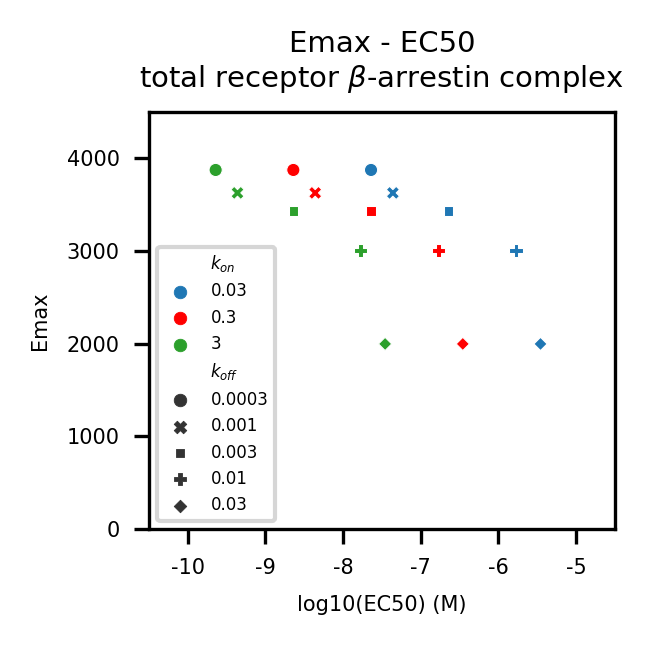

In [33]:
f = plt.figure(figsize=(2.25, 2.25), dpi=300)
ax = f.add_subplot(111)
sns.scatterplot(x='EC50', y='Emax', hue=r'$k_{on}$', style=r'$k_{off}$', 
                data=results, ax=ax, palette={'0.03': sns.color_palette()[0],
                                              '0.3' : 'r',
                                              '3' : sns.color_palette()[2]},
                s=10)
leg = ax.legend(prop={'size': 4}, markerscale=0.5)
for lh in leg.legendHandles:
    lh.set_linewidth(0.2)
ax.set_xlabel('log10(EC50) (M)', fontsize=5, fontname='Arial')
ax.set_ylabel('Emax', fontsize=5, fontname='Arial')
ax.set_ylim(0, 4500)
ax.set_xlim(-10.5, -4.5)
ax.set_xticks([-10, -9, -8, -7, -6, -5])
ax.set_xticklabels([-10, -9, -8, -7, -6, -5], fontsize=5, fontname='Arial')
ax.set_yticks([0, 1000, 2000, 3000, 4000])
ax.set_yticklabels([0, 1000, 2000, 3000, 4000], fontsize=5, fontname='Arial')
ax.set_title('Emax - EC50\n'r'total receptor $\beta$-arrestin complex',
             fontsize=7, fontname='Arial')
plt.tight_layout()
plt.savefig(out_dir+'figure6fv2.pdf')

#### gprot

In [34]:
fnames = os.listdir('/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/')
try:
    fnames.remove('.DS_Store')
except:
    pass

In [35]:
kons = ['0.03', '0.3', '3']
koffs = ['0.0003', '0.001', '0.003', '0.01', '0.03']
results = pd.DataFrame(columns=['kon', 'koff', 'Emax', 'EC50'])
for kon_ in kons:
  for koff_ in koffs:
    print(kon_, koff_)
    fnames_ = [x for x in fnames if 'koff_%s_kon_%s' % (koff_, kon_) in x]
    arr = []
    cc = []
    for fname_ in fnames_:
      data = pd.read_csv('/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
      data.columns = data.columns.astype(int)
      cc.append(float(fname_.split('_')[-1][:-4]))
      arr.append(data[molecules_dict['$\mathbf{G_{GTP}}$']].sum(1)[t])
    temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr).astype(float),
                    p0=(np.array(arr).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
    Emax, EC50 = temp[0]
    results.loc[len(results)] = kon_, koff_, Emax, EC50

0.03 0.0003
0.03 0.001
0.03 0.003
0.03 0.01
0.03 0.03
0.3 0.0003
0.3 0.001
0.3 0.003
0.3 0.01
0.3 0.03
3 0.0003
3 0.001
3 0.003
3 0.01
3 0.03


In [ ]:
results.to_csv(out_dir+'ec50-emax-gprot.csv')

In [42]:
results.columns = [r'$k_{on}$', r'$k_{off}$', 'Emax', 'EC50']

In [43]:
results

,$k_{on}$,$k_{off}$,Emax,EC50
0,0.03,0.0003,3805.488105,-8.610311
1,0.03,0.001,3794.508117,-8.451328
2,0.03,0.003,3784.152760,-8.117704
3,0.03,0.01,3779.007467,-7.601796
4,0.03,0.03,3767.821164,-7.103299
5,0.3,0.0003,3805.488729,-9.610312
6,0.3,0.001,3794.509250,-9.451328
7,0.3,0.003,3784.152696,-9.117704
8,0.3,0.01,3779.007976,-8.601796
9,0.3,0.03,3767.821521,-8.103299


/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


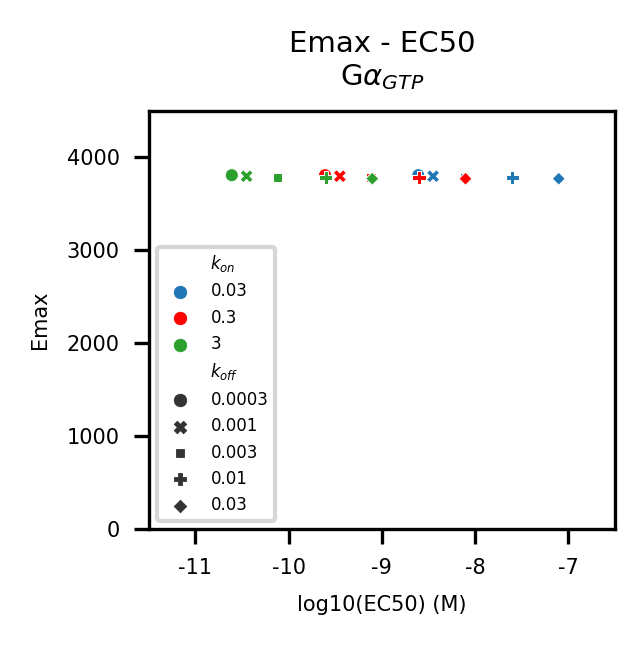

In [45]:
f = plt.figure(figsize=(2.25, 2.25), dpi=300)
ax = f.add_subplot(111)
sns.scatterplot(x='EC50', y='Emax', hue=r'$k_{on}$', style=r'$k_{off}$', 
                data=results, ax=ax, palette={'0.03': sns.color_palette()[0],
                                              '0.3' : 'r',
                                              '3' : sns.color_palette()[2]},
                s=10)
leg = ax.legend(prop={'size': 4}, markerscale=0.5)
for lh in leg.legendHandles:
    lh.set_linewidth(0.2)
ax.set_xlabel('log10(EC50) (M)', fontsize=5, fontname='Arial')
ax.set_ylabel('Emax', fontsize=5, fontname='Arial')
ax.set_ylim(0, 4500)
ax.set_xlim(-11.5, -6.5)
ax.set_xticks([-11, -10, -9, -8, -7])
ax.set_xticklabels([-11, -10, -9, -8, -7], fontsize=5, fontname='Arial')
ax.set_yticks([0, 1000, 2000, 3000, 4000])
ax.set_yticklabels([0, 1000, 2000, 3000, 4000], fontsize=5, fontname='Arial')
ax.set_title('Emax - EC50\n'r"G$\alpha_{GTP}$",
             fontsize=7, fontname='Arial')
plt.tight_layout()
plt.savefig(out_dir+'figure6gv2.pdf')

/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


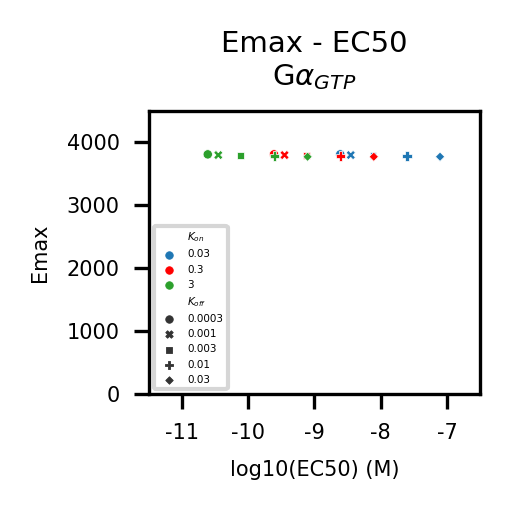

In [ ]:
f = plt.figure(figsize=(1.8, 1.8), dpi=300)
ax = f.add_subplot(111)
sns.scatterplot(x='EC50', y='Emax', hue=r'$K_{on}$', style=r'$K_{off}$', 
                data=results, ax=ax, palette={'0.03': sns.color_palette()[0],
                                              '0.3' : 'r',
                                              '3' : sns.color_palette()[2]},
                s=5)
leg = ax.legend(prop={'size': 2.5}, markerscale=0.3)
for lh in leg.legendHandles:
    lh.set_linewidth(0.2)
ax.set_xlabel('log10(EC50) (M)', fontsize=5, fontname='Arial')
ax.set_ylabel('Emax', fontsize=5, fontname='Arial')
ax.set_ylim(0, 4500)
ax.set_xlim(-11.5, -6.5)
ax.set_xticks([-11, -10, -9, -8, -7])
ax.set_xticklabels([-11, -10, -9, -8, -7], fontsize=5, fontname='Arial')
ax.set_yticks([0, 1000, 2000, 3000, 4000])
ax.set_yticklabels([0, 1000, 2000, 3000, 4000], fontsize=5, fontname='Arial')
ax.set_title('Emax - EC50\n'r"G$\alpha_{GTP}$",
             fontsize=7, fontname='Arial')
plt.tight_layout()
#plt.savefig(out_dir+'figure6g.pdf')

### Figure 6 h

In [56]:
k_on = '0.3'
high_koff = '0.03'
low_koff= '0.0003'

In [57]:
arr_results = pd.DataFrame(index=['Emax_low_arr', 'EC50_low_arr', 'Emax_high_arr', 'EC50_high_arr'],
                            columns=[10.0, 30.0, 100.0, 300.0, 600.0, 900.0, 1200.0])

In [58]:
fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.0003_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  arr_results.loc['Emax_low_arr', t] = Emax
  arr_results.loc['EC50_low_arr', t] = EC50

fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.03_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  arr_results.loc['Emax_high_arr', t] = Emax
  arr_results.loc['EC50_high_arr', t] = EC50

In [59]:
gprot_results = pd.DataFrame(index=['Emax_low_gprot', 'EC50_low_gprot', 'Emax_high_gprot', 'EC50_high_gprot'],
                            columns=[10.0, 30.0, 100.0, 300.0, 600.0, 900.0, 1200.0])

In [60]:
fnames = os.listdir('/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.0003_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['$\mathbf{G_{GTP}}$']].sum(1)[t])
for t in arr_results.columns:
  DR_points = np.array(arr[t]).astype(float)
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  gprot_results.loc['Emax_low_gprot', t] = Emax
  gprot_results.loc['EC50_low_gprot', t] = EC50

fnames = os.listdir('/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.03_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['$\mathbf{G_{GTP}}$']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  gprot_results.loc['Emax_high_gprot', t] = Emax
  gprot_results.loc['EC50_high_gprot', t] = EC50

In [61]:
arr_results.to_csv(out_dir+'bias-arrestin.csv')
gprot_results.to_csv(out_dir+'bias-gprot.csv')

In [62]:
a = (gprot_results.loc['Emax_high_gprot'] * 10**arr_results.loc['EC50_high_arr']) /\
(10**gprot_results.loc['EC50_high_gprot'] * arr_results.loc['Emax_high_arr'])

b = (arr_results.loc['Emax_low_arr'] * 10**gprot_results.loc['EC50_low_gprot']) /\
(10**arr_results.loc['EC50_low_arr'] * gprot_results.loc['Emax_low_gprot'])
int_bias = np.log10(a.astype(float) * b.astype(float))

In [63]:

arr_results = pd.DataFrame(index=['Emax_low_arr', 'EC50_low_arr', 'Emax_high_arr', 'EC50_high_arr'],
                            columns=[10.0, 30.0, 100.0, 300.0, 600.0, 900.0, 1200.0])

In [64]:
fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.0003_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  arr_results.loc['Emax_low_arr', t] = Emax
  arr_results.loc['EC50_low_arr', t] = EC50

fnames = os.listdir('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.03_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_arrestin_overexpression/No_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['Total Arrestin-Receptor']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  arr_results.loc['Emax_high_arr', t] = Emax
  arr_results.loc['EC50_high_arr', t] = EC50

In [65]:
gprot_results = pd.DataFrame(index=['Emax_low_gprot', 'EC50_low_gprot', 'Emax_high_gprot', 'EC50_high_gprot'],
                            columns=[10.0, 30.0, 100.0, 300.0, 600.0, 900.0, 1200.0])

In [66]:
fnames = os.listdir('/content/drive/MyDrive/data/receptor_gprotein_overexpression/No_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.0003_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_gprotein_overexpression/No_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['$\mathbf{G_{GTP}}$']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  gprot_results.loc['Emax_low_gprot', t] = Emax
  gprot_results.loc['EC50_low_gprot', t] = EC50

fnames = os.listdir('/content/drive/MyDrive/data/receptor_gprotein_overexpression/No_internalisation/Koff_Kon_all/')
fnames = [x for x in fnames if 'koff_0.03_kon_0.3' in x]
arr = {}
for t in arr_results.columns:
  arr[t] = []
cc = []
for fname_ in fnames:
    data = pd.read_csv('/content/drive/MyDrive/data/receptor_gprotein_overexpression/No_internalisation/Koff_Kon_all/'+fname_,
                        sep=',', header=0, index_col=0)
    data.columns = data.columns.astype(int)
    cc.append(float(fname_.split('_')[-1][:-4]))
    for t in arr_results.columns:
      arr[t].append(data[molecules_dict['$\mathbf{G_{GTP}}$']].sum(1)[t])
for t in arr_results.columns:
  temp = curve_fit(DR_curve, 
                    np.array(cc).astype(float), 
                    np.array(arr[t]).astype(float),
                    p0=(np.array(arr[t]).astype(float).max(), np.median(np.array(cc).astype(float))),
                    )
  Emax, EC50 = temp[0]
  gprot_results.loc['Emax_high_gprot', t] = Emax
  gprot_results.loc['EC50_high_gprot', t] = EC50

In [67]:
arr_results.to_csv(out_dir+'bias-arrestin-noint.csv')
gprot_results.to_csv(out_dir+'bias-gprot-noint.csv')

In [68]:
a = (gprot_results.loc['Emax_high_gprot'] * 10**arr_results.loc['EC50_high_arr']) /\
(10**gprot_results.loc['EC50_high_gprot'] * arr_results.loc['Emax_high_arr'])

b = (arr_results.loc['Emax_low_arr'] * 10**gprot_results.loc['EC50_low_gprot']) /\
(10**arr_results.loc['EC50_low_arr'] * gprot_results.loc['Emax_low_gprot'])
noint_bias = np.log10(a.astype(float) * b.astype(float))

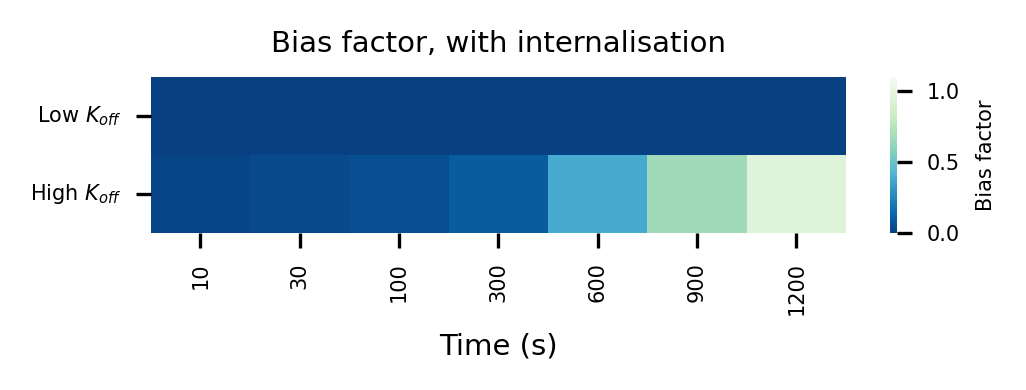

In [88]:
data = pd.DataFrame(0.0, index=['low', 'high'], columns=int_bias.index)
data.loc['high'] = int_bias
f = plt.figure(figsize=(3.6, 1.4), dpi=300)
ax = sns.heatmap(data, cmap='GnBu_r', vmax=1.1, vmin=0.0)
ax.set_yticklabels([r'Low $K_{off}$', r'High $K_{off}$'], fontsize=5, fontname='Arial', rotation=0)
ax.set_xticklabels(int_bias.index.astype(int), fontsize=5, fontname='Arial')
plt.title('Bias factor, with internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=7, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label('Bias factor', 
               fontsize=5, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=5)
plt.tight_layout()
plt.savefig(out_dir+'figure6h-topv2.pdf')

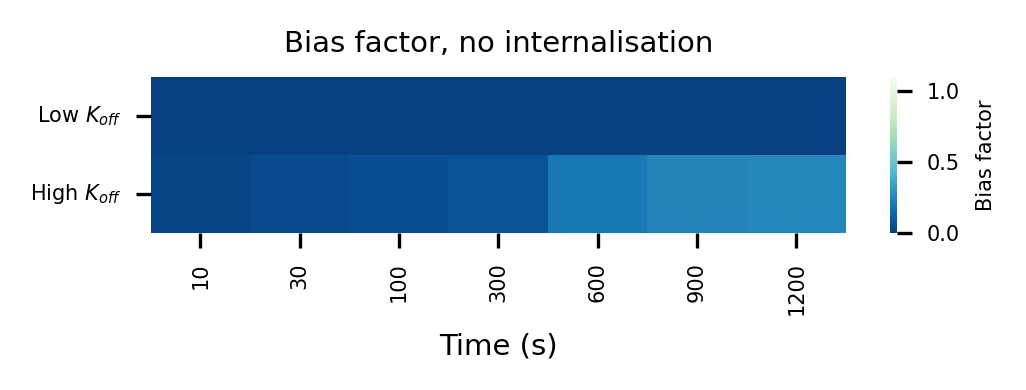

In [89]:
data = pd.DataFrame(0.0, index=['low', 'high'], columns=noint_bias.index)
data.loc['high'] = noint_bias
f = plt.figure(figsize=(3.6, 1.4), dpi=300)
ax = sns.heatmap(data, cmap='GnBu_r', vmax=1.1, vmin=0.0)
ax.set_yticklabels([r'Low $K_{off}$', r'High $K_{off}$'], fontsize=5, fontname='Arial', rotation=0)
ax.set_xticklabels(int_bias.index.astype(int), fontsize=5, fontname='Arial')
plt.title('Bias factor, no internalisation', fontsize=7, fontname='Arial')
plt.xlabel('Time (s)', fontsize=7, fontname='Arial')
cbar = ax.collections[0].colorbar
cbar.set_label('Bias factor', 
               fontsize=5, fontname='Arial')
cbar.ax.yaxis.set_tick_params(labelsize=5)
plt.tight_layout()
plt.savefig(out_dir+'figure6h-bottomv2.pdf')

### S17

In [ ]:
#low_koff=0.0003
#k_on = 0.3
#'$\mathbf{G_{GTP}}$':[23,33],
#                '$\mathbf{IP_{3}}$':[40],
dname = '/content/drive/MyDrive/data/receptor_arrestin_overexpression/With_internalisation/Koff_Kon_all/'
fnames= os.listdir(dname)

In [ ]:
fnames = [x for x in fnames if x.split('_')[4]=='0.0003']
fnames = [x for x in fnames if x.split('_')[6]=='0.3']
prefix = list(set([x.split('-')[0] for x in fnames]))[0]
ccs = [-float(x.split('-')[1][:-4]) for x in fnames]
ccs.sort()

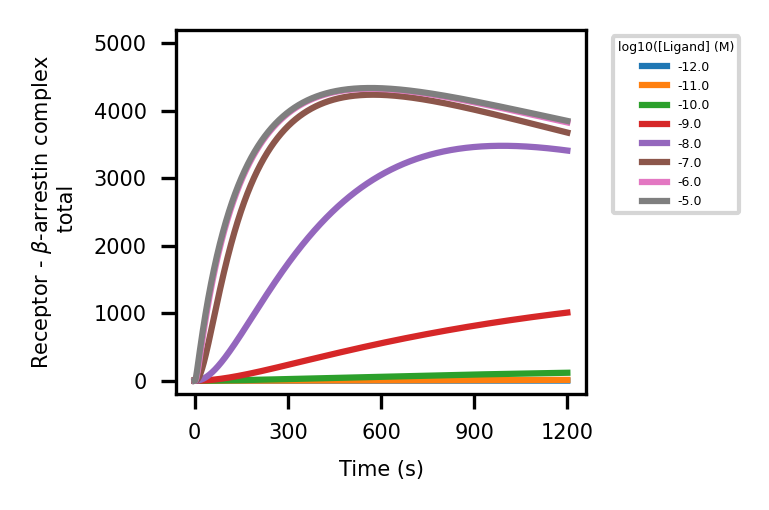

In [ ]:
f = plt.figure(figsize=(2.7, 1.8), dpi=300)
for cc in ccs:
  data = pd.read_csv(dname+prefix+str(cc)+'.csv', sep=',',
                     header=0, index_col=0)
  data.columns = data.columns.astype(int)
  plt.plot(data[molecules_dict['Total Arrestin-Receptor']].sum(1))
plt.ylim(-200, 5200)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'Receptor - $\beta$-arrestin' ' complex\n total', fontsize=5, fontname='Arial')
leg = plt.legend(ccs, fontsize=3, bbox_to_anchor=(1.05, 1),)
leg.set_title('log10([Ligand] (M)',  prop={'size': 3})
plt.tight_layout()
plt.savefig(out_dir+'sfig17c.pdf')

In [ ]:
dname = '/content/drive/MyDrive/data/receptor_gprotein_overexpression/With_internalisation/Koff_Kon_all/'
fnames= os.listdir(dname)
fnames = [x for x in fnames if x.split('_')[4]=='0.0003']
fnames = [x for x in fnames if x.split('_')[6]=='0.3']
prefix = list(set([x.split('-')[0] for x in fnames]))[0]
ccs = [-float(x.split('-')[1][:-4]) for x in fnames]
ccs.sort()

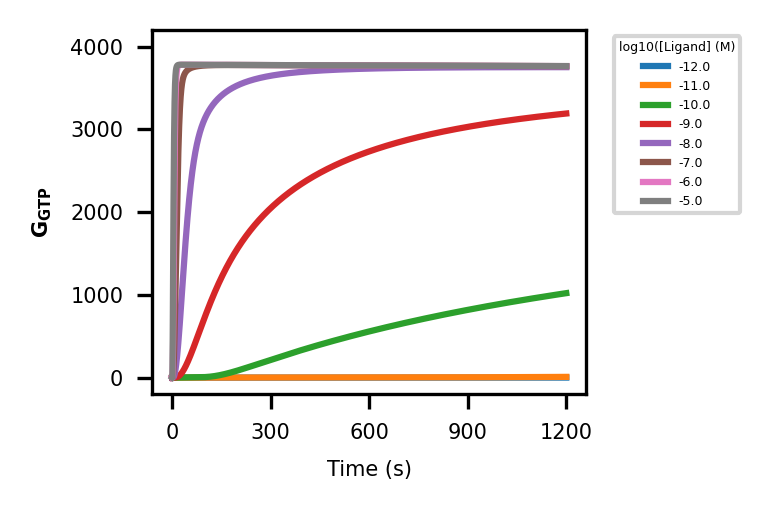

In [ ]:
f = plt.figure(figsize=(2.7, 1.8), dpi=300)
for cc in ccs:
  data = pd.read_csv(dname+prefix+str(cc)+'.csv', sep=',',
                     header=0, index_col=0)
  data.columns = data.columns.astype(int)
  plt.plot(data[molecules_dict['$\mathbf{G_{GTP}}$']].sum(1))
plt.ylim(-200, 4200)
plt.yticks([0, 1000, 2000, 3000, 4000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'$\mathbf{G_{GTP}}$', fontsize=5, fontname='Arial')
leg = plt.legend(ccs, fontsize=3, bbox_to_anchor=(1.05, 1),)
leg.set_title('log10([Ligand] (M)',  prop={'size': 3})
plt.tight_layout()
plt.savefig(out_dir+'sfig17a.pdf')

In [ ]:
dname = '/content/drive/MyDrive/data/receptor_overexpression/With_internalisation/Koff_Kon_all/'
fnames= os.listdir(dname)
fnames = [x for x in fnames if x.split('_')[4]=='0.0003']
fnames = [x for x in fnames if x.split('_')[6]=='0.3']
prefix = list(set([x.split('-')[0] for x in fnames]))[0]
ccs = [-float(x.split('-')[1][:-4]) for x in fnames]
ccs.sort()

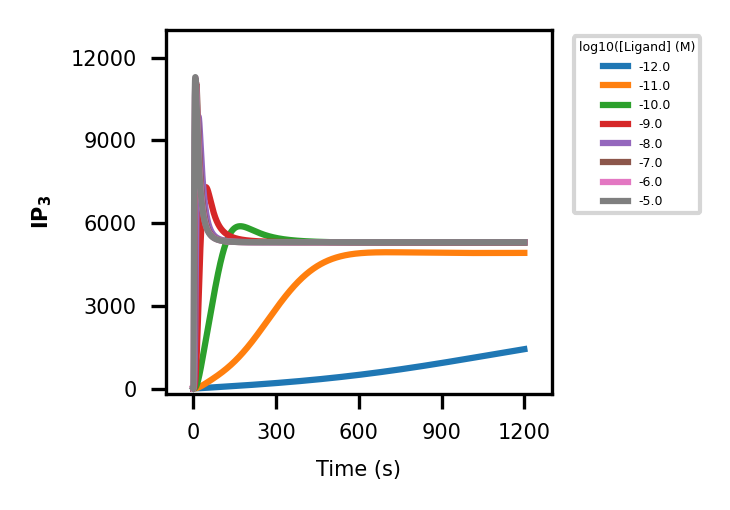

In [ ]:
f = plt.figure(figsize=(2.7, 1.8), dpi=300)

ax = f.add_subplot(111)
ax.set_ylim(-200, 13000)
ax.set_xlim(-100, 1300)
ax.set_aspect(0.1)
for cc in ccs:
  data = pd.read_csv(dname+prefix+str(cc)+'.csv', sep=',',
                     header=0, index_col=0)
  data.columns = data.columns.astype(int)
  plt.plot(data[40])
plt.ylim(-200, 13000)
plt.yticks([0, 3000, 6000, 9000, 12000], fontsize=5, fontname='Arial')
plt.xticks([0, 300, 600, 900, 1200], fontsize=5, fontname='Arial')
plt.xlabel('Time (s)', fontsize=5, fontname='Arial')
plt.ylabel(r'$\mathbf{IP_{3}}$', fontsize=5, fontname='Arial')
leg = plt.legend(ccs, fontsize=3, bbox_to_anchor=(1.4, 1))
leg.set_title('log10([Ligand] (M)',  prop={'size': 3})
plt.tight_layout()
plt.savefig(out_dir+'sfig17b.pdf')